<a href="https://colab.research.google.com/github/jamwine/Tensorflow/blob/master/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


Changing Directory to Google Colab Folder

In [2]:
import os
os.chdir('gdrive/My Drive/Colab Notebooks')
os.listdir(os.getcwd())

['ImageNetLabels.txt',
 'Images',
 'variables',
 'assets',
 'flags.csv',
 'flags.gsheet',
 'DataMining.ipynb',
 'Week 3 Programming Assignment.ipynb',
 'model_checkpoints',
 'model_checkpoints_5000',
 'results.csv',
 'config.json',
 'lemon.jpg',
 'viaduct.jpg',
 'water_tower.jpg',
 'data',
 'saved_model.pb',
 'SVHN - Capstone Project',
 'Untitled.ipynb',
 'Tensorflow']

In [0]:
# !pip install tensorflow==2

In [4]:
import tensorflow as tf
print(tf.__version__)

2.0.0


Keras is a high-level neural network API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 

TensorFlow Documentation
 * https://www.tensorflow.org/api_docs/python/tf/keras

Keras Documentation
* https://keras.io/

Jupyter Notebook's TensorFlow 1.x code to TensorFlow 2 code
 * http://tf2up.ml/



### Difference between Sequential and Functional API Models:
**Sequential models** are easy and quick. Basically, sequential models contains a sequence of layers with automatic layer interconnection.

**Model Class with Functional API** are more detailed, powerful and complex neural networks. The layers are arranged into functional units having a user defined layer connection.

* https://www.heatonresearch.com/2017/06/01/hidden-layers.html



***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [6]:
# Build the Sequential feedforward neural network model by alternative methods

model1 = Sequential([ # list of Keras layers
  Flatten(input_shape=(28,28),name='Flatten_Layer'), #(784,) is the one dimensional input size
  Dense(16, activation='relu',name='Dense_Layer_1'),
  Dense(16, activation='relu',name='Dense_Layer_2'),
  Dense(10, activation='softmax',name='Dense_Layer_3'),
])
model1.summary() # summary() outputs the layers with their shapes, number of trainable parameters

model2 = Sequential([
  Flatten(input_shape=(28,28),name='Flatten_Layer'),
  Dense(16, activation='relu',name='Dense_Layer_1'),
  Dense(16, activation='tanh',name='Dense_Layer_2'),
  Dense(10,name='Dense_Layer_3'),
  Softmax(name='Softmax_Layer') # Defining Softmax layer separately
])
model2.summary()

model3 = Sequential()
model3.add(Dense(16,activation='relu',input_shape=(784,),name='Dense_Layer_1')) # Adding layers separately using add()
model3.add(Dense(16, activation='sigmoid',name='Dense_Layer_2'))
model3.add(Dense(10,activation='softmax',name='Dense_Layer_3'))
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten_Layer (Flatten)      (None, 784)               0         
_________________________________________________________________
Dense_Layer_1 (Dense)        (None, 16)                12560     
_________________________________________________________________
Dense_Layer_2 (Dense)        (None, 16)                272       
_________________________________________________________________
Dense_Layer_3 (Dense)        (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten_Layer (Flatten)      (None, 784)               0         
______________________________

model.plot_model() illustrates the model layer hierarchy by showing the connections. The output is a graphic file with presentation quality.

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [8]:
# Build the Sequential convolutional neural network model

model1=Sequential([
      Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),name='Convolutional_layer'), # output shape is (None, 26, 26, 16), 28-(3-1)=26
      MaxPooling2D(pool_size=(3,3),name="MaxPooling_layer"), # output shape is (None, 8, 8, 16), 26//3=8
      Flatten(name='Flatten_layer'), 
      Dense(10,activation='softmax',name='Dense_layer')
])
model1.summary()

model2=Sequential([
      Conv2D(16,kernel_size=(3,3),activation='relu',padding='SAME',input_shape=(28,28,1),name='Convolutional_layer'), # When padding='SAME', output shape is (None, 28, 28, 16), 28-(0)=28
      MaxPooling2D(pool_size=(3,3),name="MaxPooling_layer"), # output shape is (None, 9, 9, 16), 28//3=9
      Flatten(name='Flatten_layer'),
      Dense(10,activation='softmax',name='Dense_layer')
])
model2.summary()

model3=Sequential([
      Conv2D(16,kernel_size=3,activation='relu',padding='SAME',strides=2,input_shape=(28,28,1),name='Convolutional_layer'), # When strides=2 and padding='SAME', output shape is (None, 14, 14, 16), (28-(0))/2=14
      MaxPooling2D(pool_size=3,name="MaxPooling_layer"), # output shape is (None, 4, 4, 16), 14//3=4
      Flatten(name='Flatten_layer'),
      Dense(10,activation='softmax',name='Dense_layer')
])
model3.summary()

model4=Sequential([
      Conv2D(16,kernel_size=3,activation='relu',strides=2,input_shape=(28,28,1),name='Convolutional_layer'), # When strides=2, output shape is (None, 13, 13, 16), (28-(2))/2=13
      MaxPooling2D(pool_size=2,name="MaxPooling_layer"), # output shape is (None, 6, 6, 16), 13//2=6
      Flatten(name='Flatten_layer'),
      Dense(10,activation='softmax',name='Dense_layer')
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolutional_layer (Conv2D) (None, 26, 26, 16)        160       
_________________________________________________________________
MaxPooling_layer (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
Flatten_layer (Flatten)      (None, 1024)              0         
_________________________________________________________________
Dense_layer (Dense)          (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolutional_layer (Conv2D) (None, 28, 28, 16)        160       
____________________________

### Default weights and biases

In the above models, we have not specified the initial values of the weights and biases in each layer of our neural networks. The default values of the weights and biases in TensorFlow depend on the type of layers we are using. 

For example, in a `Dense` layer, the biases are set to zero (`zeros`) by default, while the weights are set according to `glorot_uniform`, the Glorot uniform initialiser. The Glorot uniform initialiser draws the weights uniformly at random from the closed interval $[-c,c]$, where $$c = \sqrt{\frac{6}{n_{input}+n_{output}}}$$

and $n_{input}$ and $n_{output}$ are the number of inputs to, and outputs from the layer respectively.

### Initialising own weights and biases

When we construct a model in TensorFlow, each layer has optional arguments `kernel_initialiser` and `bias_initialiser`, which are used to set the weights and biases respectively.

If a layer has no weights or biases (e.g. it is a max pooling layer), then trying to set either `kernel_initialiser` or `bias_initialiser` will throw an error.

### Custom weight and bias initialisers
Initializers must take in two arguments, the `shape` of the tensor to be initialised, and its `dtype`.

In [9]:
#Constructing a model
from tensorflow.keras.layers import Conv1D, MaxPooling1D
import tensorflow.keras.backend as K

model_with_weights = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu', name='Convolution_1D_layer'),
    MaxPooling1D(pool_size=4, name='Max_pooling_1D_layer'),
    Flatten(name='Flatten_layer'),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu', name='Dense_layer_1'),
])

#Adding some layers to our model
model_with_weights.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu', name='Dense_layer_2'),)
model_with_weights.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu', name='Dense_layer_3'))

#Example of a custom initializer
def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)
model_with_weights.add(Dense(64, kernel_initializer=my_init, name='Dense_layer_4'))

model_with_weights.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution_1D_layer (Conv1D (None, 126, 16)           3088      
_________________________________________________________________
Max_pooling_1D_layer (MaxPoo (None, 31, 16)            0         
_________________________________________________________________
Flatten_layer (Flatten)      (None, 496)               0         
_________________________________________________________________
Dense_layer_1 (Dense)        (None, 64)                31808     
_________________________________________________________________
Dense_layer_2 (Dense)        (None, 64)                4160      
_________________________________________________________________
Dense_layer_3 (Dense)        (None, 8)                 520       
_________________________________________________________________
Dense_layer_4 (Dense)        (None, 64)               

### Visualising the initialised weights and biases
---
Finally, the effect of our initialisers on the weights and biases can be visualized by plotting histograms of the resulting values. 

Compare these plots with the selected initialisers for each layer above.

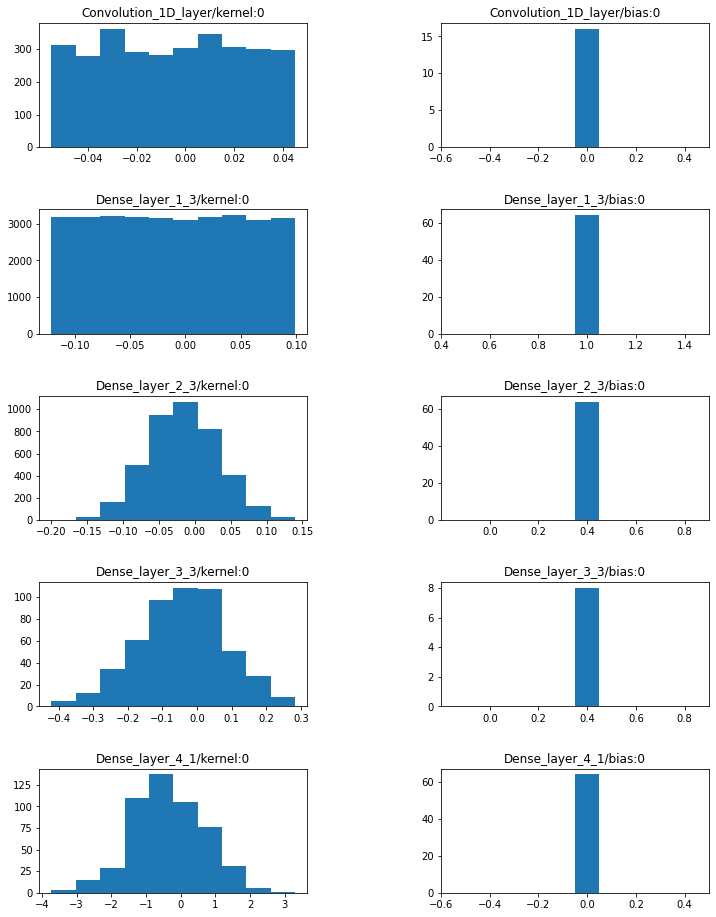

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model_with_weights.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

***
<a id="coding_tutorial_3"></a>
## The compile method

### Case 1 - Binary Classification with sigmoid activation function
Suppose we are training a model for a binary classification problem with a sigmoid activation function. Given a training example with input $x^{(i)}$, the model will output a float between 0 and 1. Based on whether this float is less than or greater than our "threshold" (which by default is set at 0.5), we round the float to get the predicted classification $y_{pred}$ from the model.

The accuracy metric compares the value of $y_{pred}$ on each training example with the true output, the one-hot coded vector $y_{true}^{(i)}$ from our training data.

Let $$\delta(y_{pred}^{(i)},y_{true}^{(i)}) = \begin{cases} 1 & y_{pred}=y_{true}\\
0 & y_{pred}\neq y_{true} \end{cases}$$

The accuracy metric  computes the mean of $\delta(y_{pred}^{(i)},y_{true}^{(i)})$ over all training examples.

$$ accuracy = \frac{1}{N} \sum_{i=1}^N \delta(y_{pred}^{(i)},y_{true}^{(i)}) $$

In [11]:
# Sigmoid activation function

y_true = tf.constant([0.0,1.0,1.0])
y_pred = tf.constant([0.4,0.8, 0.3])
accuracy = K.mean(K.equal(y_true, K.round(y_pred)))
accuracy

<tf.Tensor: id=738, shape=(), dtype=float32, numpy=0.6666667>

### Case 2 - Categorical Classification
Now suppose we are training a model for a classification problem which should sort data into $m>2$ different classes using a softmax activation function in the last layer.

Given a training example with input $x^{(i)}$, the model will output a tensor of probabilities $p_1, p_2, \dots p_m$, giving the likelihood (according to the model) that $x^{(i)}$ falls into each class.

The accuracy metric works by determining the largest argument in the $y_{pred}^{(i)}$ tensor, and compares its index to the index of the maximum value of $y_{true}^{(i)}$ to determine $\delta(y_{pred}^{(i)},y_{true}^{(i)})$. It then computes the accuracy in the same way as for the binary classification case.

$$ accuracy = \frac{1}{N} \sum_{i=1}^N \delta(y_{pred}^{(i)},y_{true}^{(i)}) $$

In the backend of Keras, the accuracy metric is implemented slightly differently depending on whether we have a binary classification problem ($m=2$) or a categorical classifcation problem. Note that the accuracy for binary classification problems is the same, no matter if we use a sigmoid or softmax activation function to obtain the output.

In [12]:
# Binary classification with softmax

y_true = tf.constant([[0.0,1.0],[1.0,0.0],[1.0,0.0],[0.0,1.0]])
y_pred = tf.constant([[0.4,0.6], [0.3,0.7], [0.05,0.95],[0.33,0.67]])
accuracy =K.mean(K.equal(y_true, K.round(y_pred)))
accuracy

<tf.Tensor: id=745, shape=(), dtype=float32, numpy=0.5>

In [13]:
# Categorical classification with m>2

y_true = tf.constant([[0.0,1.0,0.0,0.0],[1.0,0.0,0.0,0.0],[0.0,0.0,1.0,0.0]])
y_pred = tf.constant([[0.4,0.6,0.0,0.0], [0.3,0.2,0.1,0.4], [0.05,0.35,0.5,0.1]])
accuracy = K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))
accuracy

<tf.Tensor: id=755, shape=(), dtype=float32, numpy=0.6666667>

### Sparse categorical accuracy

This is a very similar metric to categorical accuracy with one major difference - the label $y_{true}$ of each training example is not expected to be a one-hot encoded vector, but to be a tensor consisting of a single integer. This integer is then compared to the index of the maximum argument of $y_{pred}$ to determine $\delta(y_{pred}^{(i)},y_{true}^{(i)})$.

### (Sparse) Top $k$-categorical accuracy 
In top $k$-categorical accuracy, instead of computing how often the model correctly predicts the label of a training example, the metric computes how often the model has $y_{true}$ in the top $k$ of its predictions. By default, $k=5$.

As before, the main difference between top $k$-categorical accuracy and its sparse version is that the former assumes $y_{true}$ is a one-hot encoded vector, whereas the sparse version assumes $y_{true}$ is an integer.

### Custom metrics
A custom metric takes in (at least) two arguments called `y_true` and `y_pred` and then output a single tensor value.

In [14]:
# Define the model optimizer, loss function and metrics

model1.compile(optimizer='adam', # 'sgd', 'rmsprop', 'adadelta'
               loss='sparse_categorical_crossentropy', # 'categorical_crossentropy', 'binary_crossentropy', 'mean_squared_error'
               metrics=['accuracy','mae']) # 'mape'

model2.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.BinaryCrossentropy(), 
               metrics=['top_k_categorical_accuracy',tf.keras.metrics.MeanAbsoluteError()])

model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
               metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.7),tf.keras.metrics.MeanAbsoluteError()])

# Define a custom metric
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

# Specify k instead with the sparse top-k categorical accuracy
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[mean_pred])

print('Optimizers:\n',model1.optimizer,model2.optimizer,model3.optimizer,model4.optimizer,'\n')
print('Losses:\n',model1.loss,model2.loss,model3.loss,model4.loss,'\n')
print('Metrics:\n',model1.metrics,model2.metrics,model3.metrics,model4.metrics,'\n')

Optimizers:
 <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f53732a6080> <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7f53732a6198> <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7f53732a6048> <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f53731521d0> 

Losses:
 sparse_categorical_crossentropy <tensorflow.python.keras.losses.BinaryCrossentropy object at 0x7f5378e3fa90> <tensorflow.python.keras.losses.BinaryCrossentropy object at 0x7f53731b05c0> sparse_categorical_crossentropy 

Metrics:
 [<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f5373230e10>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f5373230a20>] [<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f53731b0198>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f5378e3f470>] [<tensorflow.python.keras.metrics.BinaryAccuracy object at 0x7f53731b0cc0>, <tensorflow.python.keras.metrics.MeanA

***
<a id="coding_tutorial_4"></a>
## The fit method

#### Load the data

In [16]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

# Print the shape of the training data
train_images.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

label: Ankle boot


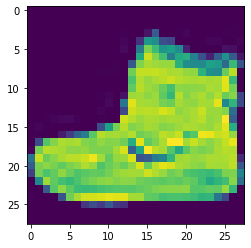

In [17]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

# Rescale the image values so that they lie in between 0 and 1.
train_images=train_images/255.0
test_images=test_images/255.0

# Display one of the images
i=0
img=train_images[i,:,:]
plt.imshow(img)
print(f'label: {labels[train_labels[i]]}')

In [18]:
# Fit the model
history1 = model1.fit(train_images[...,np.newaxis],train_labels,epochs=8,batch_size=256)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 15s 253us/sample - loss: 0.8521 - accuracy: 0.7306 - mae: 4.4200
Epoch 2/8
60000/60000 [==============================] - 15s 242us/sample - loss: 0.4827 - accuracy: 0.8321 - mae: 4.4200
Epoch 3/8
60000/60000 [==============================] - 15s 243us/sample - loss: 0.4253 - accuracy: 0.8532 - mae: 4.4200
Epoch 4/8
60000/60000 [==============================] - 15s 243us/sample - loss: 0.3953 - accuracy: 0.8628 - mae: 4.4200
Epoch 5/8
60000/60000 [==============================] - 15s 243us/sample - loss: 0.3782 - accuracy: 0.8679 - mae: 4.4200
Epoch 6/8
60000/60000 [==============================] - 15s 242us/sample - loss: 0.3659 - accuracy: 0.8721 - mae: 4.4200
Epoch 7/8
60000/60000 [==============================] - 15s 242us/sample - loss: 0.3552 - accuracy: 0.8770 - mae: 4.4200
Epoch 8/8
60000/60000 [==============================] - 15s 244us/sample - loss: 0.3468 - accuracy: 0.8790 - mae: 4.4200


#### Plot training history

In [19]:
# Load the history into a pandas Dataframe

df1=pd.DataFrame(history1.history)
df1.head()

,loss,accuracy,mae
0,0.852149,0.730567,4.420002
1,0.482745,0.832133,4.420000
2,0.425349,0.853167,4.420001
3,0.395272,0.862833,4.419998
4,0.378220,0.867933,4.420001


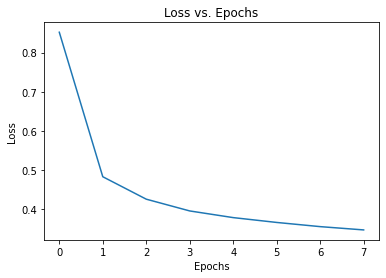

In [20]:
# Make a plot for the loss

loss_plot=df1.plot(y='loss',title='Loss vs. Epochs',legend=False)
loss_plot.set(xlabel='Epochs',ylabel='Loss');

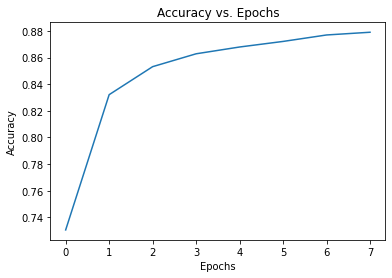

In [21]:
# Make a plot for the accuracy

acc_plot=df1.plot(y='accuracy',title='Accuracy vs. Epochs',legend=False)
acc_plot.set(xlabel='Epochs',ylabel='Accuracy');

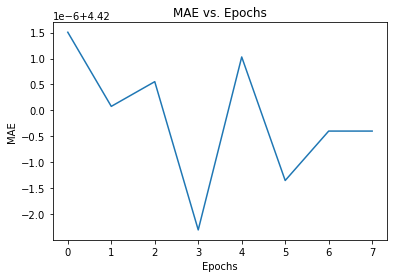

In [22]:
# Make a plot for the additional metric

mae_plot=df1.plot(y='mae',title='MAE vs. Epochs',legend=False)
mae_plot.set(xlabel='Epochs',ylabel='MAE');

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

#### Evaluate the model on the test set

In [23]:
# Evaluate the model

test_loss, test_accuracy, test_mae= model1.evaluate(test_images[...,np.newaxis],test_labels, verbose=2)

10000/1 - 2s - loss: 0.3460 - accuracy: 0.8671 - mae: 4.4200


#### Make predictions from the model

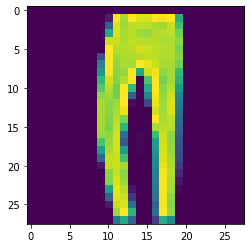

Label: Trouser


In [24]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [25]:
# Get the model predictions

predictions=model1.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model Prediction: {labels[np.argmax(predictions)]}")

Model Prediction: Trouser


## Model Validation and Regularization
Regularization techniques are used into the model training as they have the effect of constraining the model capacity in preventing overfitting. 

In [0]:
# Load the dataset

from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [0]:
# Save the input and target variables

from sklearn.model_selection import train_test_split

data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [0]:
# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean(axis=0)) / (targets.std())

In [29]:
# Split the dataset into training and test datasets 

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import regularizers

# Building models

def get_model():
  model = Sequential([
    Dense(128, input_shape=[train_data.shape[1],], activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
  return model

def get_regularised_model(wd,rate): # wd represents weight decay and rate represents Dropout rate
  regularised_model = Sequential([
    Dense(128, kernel_regularizer=regularizers.l2(wd), input_shape=[train_data.shape[1],], activation="relu"),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
    Dropout(rate),
    Dense(1)
])
  return regularised_model

In [0]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotting_curves(history):
  frame = pd.DataFrame(history.history)
  epochs = np.arange(len(frame))

  fig = plt.figure(figsize=(12,4))

  # Loss plot
  ax = fig.add_subplot(121)
  ax.plot(epochs, frame['loss'], label="Train")
  ax.plot(epochs, frame['val_loss'], label="Validation")
  ax.set_xlabel("Epochs")
  ax.set_ylabel("Loss")
  ax.set_title("Loss vs Epochs")
  ax.legend()

  # Accuracy plot
  ax = fig.add_subplot(122)
  ax.plot(epochs, frame['mae'], label="Train")
  ax.plot(epochs, frame['val_mae'], label="Validation")
  ax.set_xlabel("Epochs")
  ax.set_ylabel("Mean Absolute Error")
  ax.set_title("Mean Absolute Error vs Epochs")
  ax.legend()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

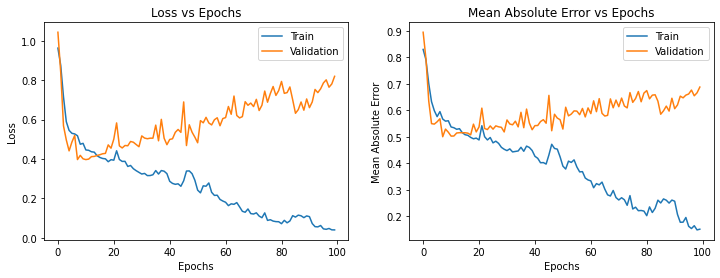

In [32]:
model=get_model()
model.summary() # Print the model summary
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Compile the model
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64,verbose=False) # Train the model
model.evaluate(test_data,test_targets,verbose=2) # Evaluate the model on test set
plotting_curves(history)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

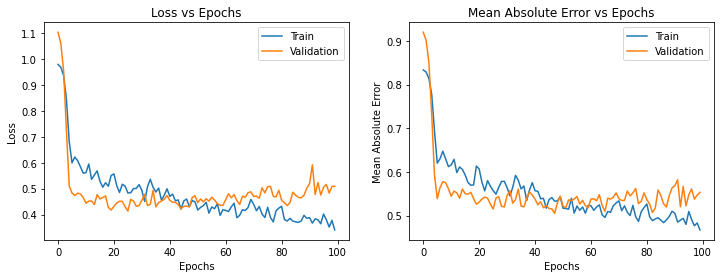

In [33]:
regularised_model=get_regularised_model(1e-5,0.3)
regularised_model.summary() # Print the model summary
regularised_model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Compile the model
regularised_history = regularised_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64,verbose=False) # Train the model
regularised_model.evaluate(test_data,test_targets,verbose=2) # Evaluate the model on test set
plotting_curves(regularised_history)

## Batch normalisation layers
We can implement batch normalisation into our model by adding it in the same way as any other layer. There are some parameters and hyperparameters associated with batch normalisation.

* The hyperparameter **momentum** is the weighting given to the previous running mean when re-computing it with an extra minibatch. By **default**, it is set to 0.99.

* The hyperparameter **$\epsilon$** (epsilon) is used for numeric stability when performing the normalisation over the minibatch. By **default** it is set to 0.001.

* The parameters **$\beta$** (beta) and **$\gamma$** (gamma) are used to implement an affine transformation after normalisation. By **default**, $\beta$ is an all-zeros vector, and $\gamma$ is an all-ones vector.

### Customising parameters
These can all be changed (along with various other properties) by adding optional arguments to `tf.keras.layers.BatchNormalization()`.

Also, the axis for batch normalisation can be specified which is set as -1 by default.

In [0]:
def get_model_with_normalisation(l1,l2,rate):
  model = Sequential([
    Dense(128, kernel_regularizer=regularizers.l1_l2(l1,l2), input_shape=[train_data.shape[1],], activation="relu"),
    BatchNormalization(),  # Batch normalisation layer
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l1_l2(l1,l2), activation='relu'),
    BatchNormalization(),  # Batch normalisation layer
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l1_l2(l1,l2), activation='relu'),
    BatchNormalization(momentum=0.95, epsilon=0.005, axis = -1, beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)),  # Batch normalisation layer
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l1_l2(l1,l2), activation='relu'),
    BatchNormalization(momentum=0.95, epsilon=0.005, axis = -1, beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)),  # Batch normalisation layer
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l1_l2(l1,l2), activation='relu'),
    BatchNormalization(momentum=0.95, epsilon=0.005, axis = -1, beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)),  # Batch normalisation layer
    Dropout(rate),
    Dense(128, kernel_regularizer=regularizers.l1_l2(l1,l2), activation='relu'),
    BatchNormalization(momentum=0.95, epsilon=0.005, axis = -1, beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)),  # Batch normalisation layer
    Dropout(rate),
    Dense(1)
])
  return model

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               1408      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)             

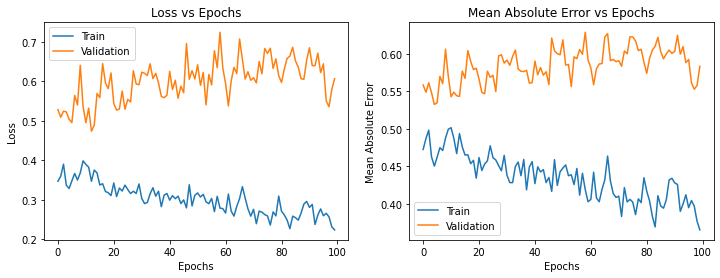

In [35]:
normalised_model=get_model_with_normalisation(1e-5,1e-5,0.3)
normalised_model.summary() # Print the model summary
normalised_model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Compile the model
normalised_history = regularised_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64,verbose=False) # Train the model
normalised_model.evaluate(test_data,test_targets,verbose=2) # Evaluate the model on test set
plotting_curves(normalised_history)

## Callbacks
* Collect information on training
* Remotely monitor training
* Tune parameters while training
* Create checkpoints
* Terminate training early
* API for user defined callbacks

### Callbacks using the logs Dictionary
The `logs` dictionary stores the loss value, along with all of the metrics we are using at the end of a batch or epoch. We can incorporate information from the `logs` dictionary into our own custom callbacks.


In [0]:
# Create the custom callback

class LossAndMetricCallback(tf.keras.callbacks.Callback):

    # Print the loss after every second batch in the training set
    def on_train_batch_end(self, batch, logs=None):
        if batch %2 ==0:
            print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
    
    # Print the loss after each batch in the test set
    def on_test_batch_end(self, batch, logs=None):
        print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))

    # Print the loss and mean absolute error after each epoch
    def on_epoch_end(self, epoch, logs=None):
        print('Epoch {}: Average loss is {:7.2f}, mean absolute error is {:7.2f}.'.format(epoch, logs['loss'], logs['mae']))
    
    # Notify the user when prediction has finished on each batch
    def on_predict_batch_end(self,batch, logs=None):
        print("Finished prediction on batch {}!".format(batch))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)             

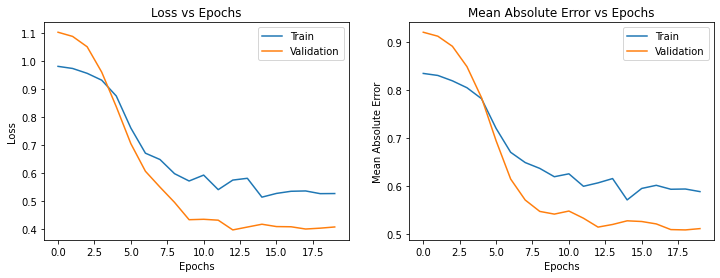

In [37]:
regularised_model1=get_regularised_model(1e-5,0.3)
regularised_model1.summary() # Print the model summary
regularised_model1.compile(optimizer='adam', loss='mse', metrics=['mae']) # Compile the model
regularised_history1 = regularised_model1.fit(train_data, train_targets, epochs=20, validation_split=0.15, batch_size=100,verbose=False,callbacks=[LossAndMetricCallback()]) # Train the model
regularised_model1.evaluate(test_data,test_targets,verbose=False,batch_size=10,callbacks=[LossAndMetricCallback()]) # Evaluate the model on test set
regularised_model1_pred = regularised_model1.predict(test_data, batch_size=10, callbacks=[LossAndMetricCallback()], verbose=False)
plotting_curves(regularised_history1)

## Learning rate scheduler

**Usage:** `tf.keras.callbacks.LearningRateScheduler(schedule, verbose=0)`

This function `schedule` should take two arguments:
* The current epoch (as an integer), and
* The current learning rate,

and return new learning rate for that epoch. 

The `LearningRateScheduler` also has an optional `verbose` argument, which prints information about the learning rate if it is set to 1.



In [0]:
# Define the learning rate schedule function

def lr_function(epoch, lr):
    if epoch % 2 == 0:
        return lr
    else:
        return lr + epoch/1000


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0020000000474974513.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0020000000949949026.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.005000000094994903.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.004999999888241291.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.009999999888241292.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.009999999776482582.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.01699999977648258.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.016999999061226845.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.025999999061226846.


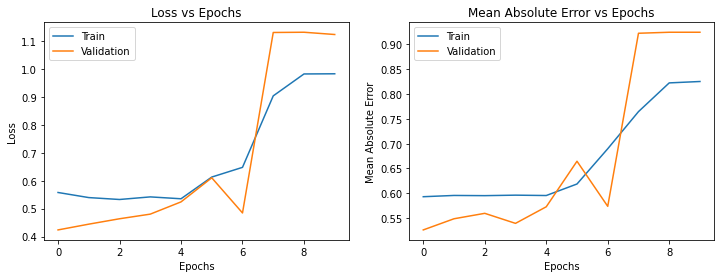

In [39]:
# Using defined schedule function
regularised_history2 = regularised_model1.fit(train_data, train_targets, epochs=10, validation_split=0.15, batch_size=100,verbose=False, callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_function, verbose=1)]) # Train the model
plotting_curves(regularised_history2)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.3333333333333333.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.125.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.07692307692307693.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.05555555555555555.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.043478260869565216.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.03571428571428571.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.030303030303030304.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.02631578947368421.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.023255813953488372.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.020833333333333332.


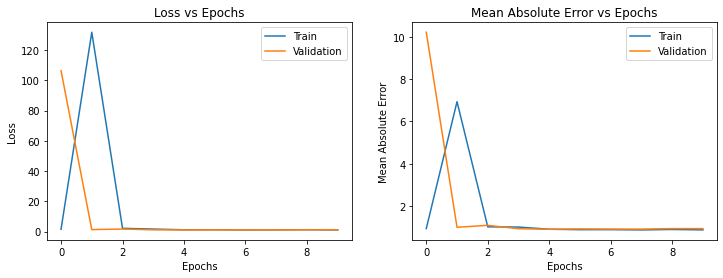

In [40]:
# Using lambda function
regularised_history2 = regularised_model1.fit(train_data, train_targets, epochs=10, validation_split=0.15, batch_size=100,verbose=False, callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda x:1/(3+5*x), verbose=1)]) # Train the model
plotting_curves(regularised_history2)

### Custom learning rate scheduler

We are going to define a callback to change the learning rate of the optimiser of a model during training. We will do this by specifying the epochs and new learning rates where we would like it to be changed.

Before training the model with a custom callback, we define the auxillary function that returns the learning rate for each epoch based on our schedule.

In [0]:
# Define the learning rate schedule. The tuples below are (start_epoch, new_learning_rate)

lr_schedule = [
    (4, 0.03), (7, 0.02), (11, 0.005), (15, 0.007)
]

def get_new_epoch_lr(epoch, lr):
    # Checks to see if the input epoch is listed in the learning rate schedule 
    # and if so, returns index in lr_schedule
    epoch_in_sched = [i for i in range(len(lr_schedule)) if lr_schedule[i][0]==int(epoch)]
    if len(epoch_in_sched)>0:
        # If it is, return the learning rate corresponding to the epoch
        return lr_schedule[epoch_in_sched[0]][1]
    else:
        # Otherwise, return the existing learning rate
        return lr

In [0]:
# Define the custom callback

class LRScheduler(tf.keras.callbacks.Callback):
    
    def __init__(self, new_lr):
        super(LRScheduler, self).__init__()
        # Add the new learning rate function to our callback
        self.new_lr = new_lr

    def on_epoch_begin(self, epoch, logs=None):
        # Make sure that the optimizer we have chosen has a learning rate, and raise an error if not
        if not hasattr(self.model.optimizer, 'lr'):
              raise ValueError('Error: Optimizer does not have a learning rate.')
                
        # Get the current learning rate
        curr_rate = float(tf.keras.backend.get_value(self.model.optimizer.lr))
        
        # Call the auxillary function to get the scheduled learning rate for the current epoch
        scheduled_rate = self.new_lr(epoch, curr_rate)

        # Set the learning rate to the scheduled learning rate
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_rate)
        print('Learning rate for epoch {} is {:7.3f}'.format(epoch, scheduled_rate))

Learning rate for epoch 0 is   0.021
Learning rate for epoch 1 is   0.021
Learning rate for epoch 2 is   0.021
Learning rate for epoch 3 is   0.021
Learning rate for epoch 4 is   0.030
Learning rate for epoch 5 is   0.030
Learning rate for epoch 6 is   0.030
Learning rate for epoch 7 is   0.020
Learning rate for epoch 8 is   0.020
Learning rate for epoch 9 is   0.020


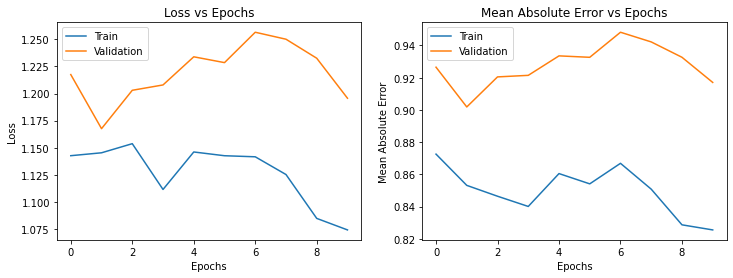

In [43]:
regularised_history3 = regularised_model1.fit(train_data, train_targets, epochs=10, validation_split=0.15, batch_size=100,verbose=False,callbacks=[LRScheduler(get_new_epoch_lr)]) # Train the model
plotting_curves(regularised_history3)

## CSV logger
**Usage** `tf.keras.callbacks.CSVLogger(filename, separator=',', append=False)`

This callback streams the results from each epoch into a CSV file.
The first line of the CSV file will be the names of pieces of information recorded on each subsequent line, beginning with the epoch and loss value. The values of metrics at the end of each epoch will also be recorded.

The only compulsory argument is the `filename` for the log to be streamed to. This could also be a filepath. The `separator` can be used for defining entries between each line. The `append` argument allows to append results to an existing file with the same name. This can be particularly useful if training is continuous.

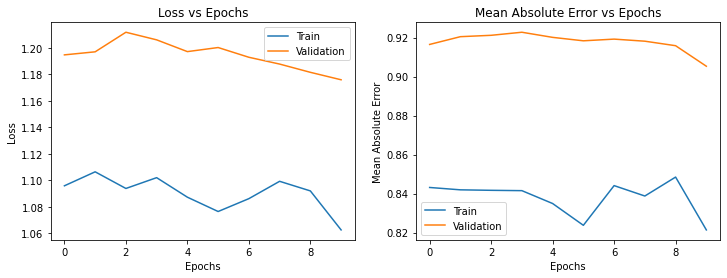

In [44]:
regularised_history3 = regularised_model1.fit(train_data, train_targets, epochs=10, validation_split=0.15,verbose=False,callbacks=[tf.keras.callbacks.CSVLogger("results.csv")]) # Train the model
plotting_curves(regularised_history3)

In [45]:
# Load the CSV

import pandas as pd
pd.read_csv("results.csv", index_col='epoch')

,loss,mae,val_loss,val_mae
epoch,,,,
0,1.095893,0.843119,1.194618,0.916479
1,1.106437,0.841909,1.196918,0.920462
2,1.093881,0.841662,1.211681,0.921165
3,1.102030,0.841489,1.205945,0.922736
4,1.087300,0.834888,1.197076,0.920110
5,1.076507,0.823714,1.200152,0.918342
6,1.086205,0.844074,1.192807,0.919211
7,1.099280,0.838737,1.187684,0.918145
8,1.092036,0.848451,1.181462,0.915835


## Lambda callbacks
**Usage** `tf.keras.callbacks.LambdaCallback(
        on_epoch_begin=None, on_epoch_end=None, 
        on_batch_begin=None, on_batch_end=None, 
        on_train_begin=None, on_train_end=None)`

Lambda callbacks are used to quickly define simple custom callbacks with the use of lambda functions.

Each of the functions require some positional arguments.
* `on_epoch_begin` and `on_epoch_end` expect two arguments: `epoch` and `logs`,
* `on_batch_begin` and `on_batch_end` expect two arguments: `batch` and `logs` and
* `on_train_begin` and `on_train_end` expect one argument: `logs`.

In [0]:
# Print the epoch number at the beginning of each epoch

epoch_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_begin=lambda epoch,logs: print('Starting Epoch {}!'.format(epoch+1)))

In [0]:
# Print the loss at the end of each batch

batch_loss_callback = tf.keras.callbacks.LambdaCallback(
    on_batch_end=lambda batch,logs: print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss'])))

In [0]:
# Inform that training is finished

train_finish_callback = tf.keras.callbacks.LambdaCallback(
    on_train_end=lambda logs: print('Training finished!'))

In [49]:
# Train the model with the lambda callbacks

history = model.fit(train_data, train_targets, epochs=5, batch_size=100,
                    callbacks=[epoch_callback, batch_loss_callback,train_finish_callback], verbose=False)

Starting Epoch 1!

 After batch 0, the loss is    0.13.

 After batch 1, the loss is    0.16.

 After batch 2, the loss is    0.16.

 After batch 3, the loss is    0.22.
Starting Epoch 2!

 After batch 0, the loss is    0.15.

 After batch 1, the loss is    0.26.

 After batch 2, the loss is    0.17.

 After batch 3, the loss is    0.12.
Starting Epoch 3!

 After batch 0, the loss is    0.10.

 After batch 1, the loss is    0.17.

 After batch 2, the loss is    0.17.

 After batch 3, the loss is    0.15.
Starting Epoch 4!

 After batch 0, the loss is    0.09.

 After batch 1, the loss is    0.20.

 After batch 2, the loss is    0.11.

 After batch 3, the loss is    0.12.
Starting Epoch 5!

 After batch 0, the loss is    0.11.

 After batch 1, the loss is    0.14.

 After batch 2, the loss is    0.12.

 After batch 3, the loss is    0.11.
Training finished!


## Reduce learning rate on plateau

**Usage** `tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.1, 
            patience=10, 
            verbose=0, 
            mode='auto', 
            min_delta=0.0001, 
            cooldown=0, 
            min_lr=0)`

The `ReduceLROnPlateau` callback allows reduction of the learning rate when a metric has stopped improving. 
The arguments are similar to those used in the `EarlyStopping` callback.
* The argument `monitor` is used to specify which metric to base the callback on.
* The `factor` is the factor by which the learning rate decreases i.e., new_lr=factor*old_lr.
* The `patience` is the number of epochs where there is no improvement on the monitored metric before the learning rate is reduced.
* The `verbose` argument will produce progress messages when set to 1.
* The `mode` determines whether the learning rate will decrease when the monitored quantity stops increasing (`max`) or decreasing (`min`). The `auto` setting causes the callback to infer the mode from the monitored quantity.
* The `min_delta` is the smallest change in the monitored quantity to be deemed an improvement.
* The `cooldown` is the number of epochs to wait after the learning rate is changed before the callback resumes normal operation.
* The `min_lr` is a lower bound on the learning rate that the callback will produce.

In [50]:
# Train the model with the ReduceLROnPlateau callback

history = model.fit(train_data, train_targets, epochs=100, batch_size=100,
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
                        monitor="loss",factor=0.2, verbose=1)], verbose=False)


Epoch 00042: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.


## Early stopping and patience

Early stopping is a technique that monitors the performance of the network for every epoch on a held out validation set during the training run, and terminates the training conditional on the validation performance. 

In [51]:
unregularised_model=get_model()
unregularised_model.compile(optimizer='adam',loss='mae')
unreg_history=unregularised_model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=False,callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])
unregularised_model.evaluate(test_data,test_targets,verbose=2)

45/1 - 0s - loss: 0.5785


0.6001491533385382

In [52]:
regularised_model=get_regularised_model(1e-8,0.2)
regularised_model.compile(optimizer='adam',loss='mae')
reg_history=regularised_model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=False,callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])
unregularised_model.evaluate(test_data,test_targets,verbose=2)

45/1 - 0s - loss: 0.5785


0.6001491533385382

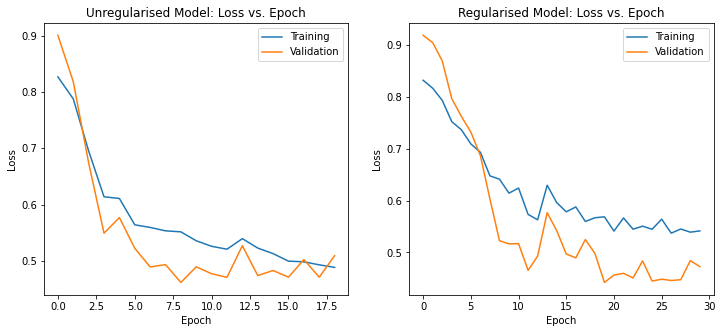

In [53]:
fig=plt.figure(figsize=(12,5))
fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised Model: Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'],loc='best')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised Model: Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'],loc='best');

## Saving and Loading Models

### Saving and Loading Models Weights

Loading and inspecting the CIFAR-10 dataset which consists of, in total, 60000 color images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. 

In [54]:
# Import the CIFAR-10 dataset and rescale the pixel values

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Use smaller subset -- speeds things up
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

170500096/170498071 [==============================] - 11s 0us/step


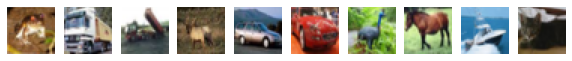

In [55]:
# Plot the first 10 CIFAR-10 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

In [0]:
# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))


# Introduce function that creates a new instance of a simple CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def get_new_model():
    model = Sequential([
        Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3), 
               activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dense(units=10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [57]:
# Create an instance of the model and show model summary

model=get_new_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 8)         1160      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
_________________________________________________

In [58]:
# Test accuracy of the untrained model, around 10% (random)

get_test_accuracy(model, x_test, y_test)

accuracy: 0.103


In [59]:
# Train model with checkpoints

from tensorflow.keras.callbacks import ModelCheckpoint 

# Create Tensorflow checkpoint object
checkpoint_path="model_checkpoints/checkpoint"
checkpoint=ModelCheckpoint(filepath=checkpoint_path, frequency='epoch',save_weights_only=True,verbose=1)

# Fit model, with simple checkpoint which saves (and overwrites) model weights every epoch
model.fit(x=x_train,y=y_train,epochs=3,callbacks=[checkpoint])

Train on 10000 samples
Epoch 1/3
 9984/10000 [============================>.] - ETA: 0s - loss: 1.9625 - accuracy: 0.2706
Epoch 00001: saving model to model_checkpoints/checkpoint
10000/10000 [==============================] - 13s 1ms/sample - loss: 1.9617 - accuracy: 0.2712
Epoch 2/3
 9984/10000 [============================>.] - ETA: 0s - loss: 1.6563 - accuracy: 0.3929
Epoch 00002: saving model to model_checkpoints/checkpoint
10000/10000 [==============================] - 12s 1ms/sample - loss: 1.6561 - accuracy: 0.3929
Epoch 3/3
 9952/10000 [============================>.] - ETA: 0s - loss: 1.5515 - accuracy: 0.4351
Epoch 00003: saving model to model_checkpoints/checkpoint
10000/10000 [==============================] - 12s 1ms/sample - loss: 1.5531 - accuracy: 0.4345


In [60]:
# Have a look at what the checkpoint creates

! ls -lh model_checkpoints/

total 177K
-rw------- 1 root root   77 Apr  7 07:27 checkpoint
-rw------- 1 root root 174K Apr  7 07:27 checkpoint.data-00000-of-00001
-rw------- 1 root root 2.0K Apr  7 07:27 checkpoint.index


#### `checkpoint`
This file is by far the smallest, at only 87 bytes. It's actually so small that we can just look at it directly. It's a human readable file with the following text:
```
model_checkpoint_path: "checkpoint"
all_model_checkpoint_paths: "checkpoint"
```
This is metadata that indicates where the actual model data is stored.

#### `checkpoint.index`
This file tells TensorFlow which weights are stored where. When running models on distributed systems, there may be different *shards*, meaning the full model may have to be recomposed from multiple sources. The model we trained is a single model on a single machine, so there is only one *shard* and all weights are stored in the same place.

#### `checkpoint.data-00000-of-00001`
This file contains the actual weights from the model. It is by far the largest of the 3 files. Recall that the model we trained had around 14000 parameters, meaning this file is roughly 12 bytes per saved weight.

* https://www.tensorflow.org/tutorials/keras/save_and_load#what_are_these_files

In [61]:
# Evaluate the performance of the trained model

get_test_accuracy(model, x_test, y_test)

accuracy: 0.455


In [62]:
# Create a new instance of the (initialised) model, accuracy around 10% again

model=get_new_model()
get_test_accuracy(model, x_test, y_test)

accuracy: 0.117


In [63]:
# Load weights -- accuracy is the same as the trained model

model.load_weights(checkpoint_path)
get_test_accuracy(model, x_test, y_test)

accuracy: 0.455


In [64]:
# Create more customised checkpoint

# Create Tensorflow checkpoint object with epoch and batch details
checkpoint_5000_path='model_checkpoints_5000/checkpoint_{epoch:02d}_{batch:04d}'
checkpoint_5000=ModelCheckpoint(filepath=checkpoint_5000_path, save_weights_only=True, save_freq=5000, verbose=1)

# Create and fit model with checkpoint
model=get_new_model()
model.fit(x=x_train,y=y_train,epochs=3,validation_data=(x_test,y_test),batch_size=10,callbacks=[checkpoint_5000])


Train on 10000 samples, validate on 1000 samples
Epoch 1/3
 4980/10000 [=============>................] - ETA: 7s - loss: 2.0120 - accuracy: 0.2460
Epoch 00001: saving model to model_checkpoints_5000/checkpoint_01_0499
 9960/10000 [============================>.] - ETA: 0s - loss: 1.8335 - accuracy: 0.3230
Epoch 00001: saving model to model_checkpoints_5000/checkpoint_01_0999
10000/10000 [==============================] - 17s 2ms/sample - loss: 1.8318 - accuracy: 0.3239 - val_loss: 1.5685 - val_accuracy: 0.4460
Epoch 2/3
 4970/10000 [=============>................] - ETA: 7s - loss: 1.5177 - accuracy: 0.4477
Epoch 00002: saving model to model_checkpoints_5000/checkpoint_02_0499
 9990/10000 [============================>.] - ETA: 0s - loss: 1.4862 - accuracy: 0.4600
Epoch 00002: saving model to model_checkpoints_5000/checkpoint_02_0999
10000/10000 [==============================] - 17s 2ms/sample - loss: 1.4864 - accuracy: 0.4599 - val_loss: 1.4200 - val_accuracy: 0.4870
Epoch 3/3
 4980

In [65]:
# Have a look at what the checkpoint creates

! ls -lh model_checkpoints_5000/

total 1.1M
-rw------- 1 root root   93 Apr  7 07:28 checkpoint
-rw------- 1 root root 174K Apr  7 07:27 checkpoint_01_0499.data-00000-of-00001
-rw------- 1 root root 2.0K Apr  7 07:27 checkpoint_01_0499.index
-rw------- 1 root root 174K Apr  7 07:27 checkpoint_01_0999.data-00000-of-00001
-rw------- 1 root root 2.0K Apr  7 07:27 checkpoint_01_0999.index
-rw------- 1 root root 174K Apr  7 07:28 checkpoint_02_0499.data-00000-of-00001
-rw------- 1 root root 2.0K Apr  7 07:28 checkpoint_02_0499.index
-rw------- 1 root root 174K Apr  7 07:28 checkpoint_02_0999.data-00000-of-00001
-rw------- 1 root root 2.0K Apr  7 07:28 checkpoint_02_0999.index
-rw------- 1 root root 174K Apr  7 07:28 checkpoint_03_0499.data-00000-of-00001
-rw------- 1 root root 2.0K Apr  7 07:28 checkpoint_03_0499.index
-rw------- 1 root root 174K Apr  7 07:28 checkpoint_03_0999.data-00000-of-00001
-rw------- 1 root root 2.0K Apr  7 07:28 checkpoint_03_0999.index


In [0]:
# Clear directory

# ! rm -r model_checkpoints
# ! rm -r model_checkpoints_5000

#### Common Methods for loading and saving models and weights

**Saving/Loading Model Weights only (having the same architecture)**

> model.save_weights(filepath='model_name')
> 
> model.load_weights(filepath='model_name')

**Saving/Loading Entire Models**

> model.save(filepath='model_name')
> 
> model.load(filepath='model_name')

**Saving/Loading Model layer structural architecture without weights**

> model.model_to_json(filepath='model_name')
>
> model.model_from_json(filepath='model_name')

 
> model.model_to_yaml(filepath='model_name')
>
>model.model_from_yaml(filepath='model_name')

A model's configuration refers to its architecture. TensorFlow has a convenient way to retrieve a model's architecture as a dictionary. A TensorFlow model has an inbuilt method get_config which returns the model's architecture as a dictionary.

In [67]:
config_dict = model.get_config()
print(config_dict)

{'name': 'sequential_16', 'layers': [{'class_name': 'Conv2D', 'config': {'name': 'conv_1', 'trainable': True, 'batch_input_shape': (None, 32, 32, 3), 'dtype': 'float32', 'filters': 16, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Conv2D', 'config': {'name': 'conv_2', 'trainable': True, 'dtype': 'float32', 'filters': 8, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_nam

A new TensorFlow model can be created from this config dictionary. This model will have reinitialized weights, which are not the same as the original model.

In [0]:
# For models that are not Sequential models, use tf.keras.Model.from_config instead of tf.keras.Sequential.from_config.

model_same_config = tf.keras.Sequential.from_config(config_dict)

In [69]:
# check explicitly that the config of both models is the same, but the weights are not

print('Same config:', 
      model.get_config() == model_same_config.get_config())
print('Same value for first weight matrix:', 
      np.allclose(model.weights[0].numpy(), model_same_config.weights[0].numpy()))

Same config: True
Same value for first weight matrix: False


It is also possible to obtain a model's config in JSON or YAML formats. This follows the same pattern:

In [70]:
import json

json_string = model.to_json()
print(json_string)


# Write out JSON config file

with open('config.json', 'w') as f:
    json.dump(json_string, f)
del json_string


# Read in JSON config file again

with open('config.json', 'r') as f:
    json_string = json.load(f)


# Reinitialize model

model_same_config = tf.keras.models.model_from_json(json_string)


# Same config, new weights

print('Same config:', 
      model.get_config() == model_same_config.get_config())
print('Same value for first weight matrix:', 
      np.allclose(model.weights[0].numpy(), model_same_config.weights[0].numpy()))

{"class_name": "Sequential", "config": {"name": "sequential_16", "layers": [{"class_name": "Conv2D", "config": {"name": "conv_1", "trainable": true, "batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "filters": 16, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Conv2D", "config": {"name": "conv_2", "trainable": true, "dtype": "float32", "filters": 8, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": 

The YAML format is similar. The details of writing out YAML files, loading them and using them to create a new model are similar as for the JSON files. Writing out, reading in and using YAML files to create models is similar to JSON files.

In [71]:
yaml_string = model.to_yaml()
print(yaml_string)

backend: tensorflow
class_name: Sequential
config:
  layers:
  - class_name: Conv2D
    config:
      activation: relu
      activity_regularizer: null
      batch_input_shape: !!python/tuple [null, 32, 32, 3]
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
      bias_regularizer: null
      data_format: channels_last
      dilation_rate: &id001 !!python/tuple [1, 1]
      dtype: float32
      filters: 16
      kernel_constraint: null
      kernel_initializer:
        class_name: GlorotUniform
        config: {seed: null}
      kernel_regularizer: null
      kernel_size: !!python/tuple [3, 3]
      name: conv_1
      padding: valid
      strides: &id002 !!python/tuple [1, 1]
      trainable: true
      use_bias: true
  - class_name: Conv2D
    config:
      activation: relu
      activity_regularizer: null
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
      bias_regularizer: null
      d

## Loading pre-trained Keras models
Import and build Keras ResNet50 model

In [72]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 8s 0us/step


In [0]:
# Retrieve the image files

!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [0]:
# Import 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img('lemon.jpg', target_size=(224, 224))
viaduct_img = load_img('viaduct.jpg', target_size=(224, 224))
water_tower_img = load_img('water_tower.jpg', target_size=(224, 224))

In [0]:
# Use ResNet50 model to classify images
# Useful function: presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

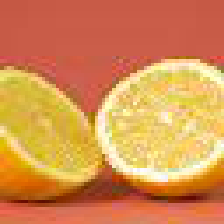

In [76]:
# Display image

lemon_img

In [77]:
# Display top 5 predictions

get_top_5_predictions(lemon_img)

40960/35363 [==================================] - 0s 0us/step


,prediction,probability
1,consomme,0.227801
2,lemon,0.221758
3,eggnog,0.151335
4,ladle,0.0400882
5,spotlight,0.0291972


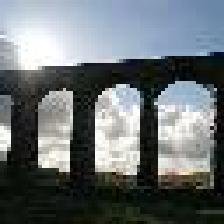

In [78]:
# Display image

viaduct_img

In [79]:
# Display top 5 predictions

get_top_5_predictions(viaduct_img)

,prediction,probability
1,vault,0.367951
2,prison,0.111742
3,viaduct,0.110738
4,window_screen,0.0882308
5,fire_screen,0.0206753


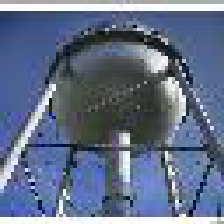

In [80]:
# Display image

water_tower_img

In [81]:
# Display top 5 predictions

get_top_5_predictions(water_tower_img)

,prediction,probability
1,solar_dish,0.384682
2,ladle,0.196178
3,planetarium,0.116683
4,strainer,0.04999
5,jigsaw_puzzle,0.0219474


## Tensorflow Hub modules
[Tensorflow Hub page](https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4)

In [0]:
import tensorflow_hub as hub

In [83]:
# Build Google's Mobilenet v1 model
# Use MobileNet model to classify images

module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  1343049   
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


In [0]:
# Retrieve the image files

!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [0]:
# Import and preprocess 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img("lemon.jpg", target_size=(160, 160))
viaduct_img = load_img("viaduct.jpg", target_size=(160, 160))
water_tower_img = load_img("water_tower.jpg", target_size=(160, 160))

In [86]:
! wget "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"

--2020-04-07 07:29:05--  https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt.1’

ImageNetLabels.txt. 100%[===================>]  10.24K  --.-KB/s    in 0.001s  

2020-04-07 07:29:06 (8.99 MB/s) - ‘ImageNetLabels.txt.1’ saved [10484/10484]



In [0]:
# Read in categories text file

with open('ImageNetLabels.txt') as txt_file:
    categories = txt_file.read().splitlines()

In [0]:
# Useful function: presents top 5 predictions

import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

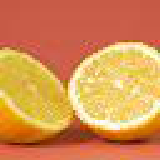

In [89]:
# Display image

lemon_img

In [90]:
# Display top 5 predictions

get_top_5_predictions(lemon_img)

,prediction
1,shower cap
2,tray
3,candle
4,brassiere
5,African chameleon


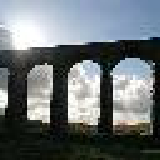

In [91]:
# Display image

viaduct_img

In [92]:
# Display top 5 predictions

get_top_5_predictions(viaduct_img)

,prediction
1,viaduct
2,pier
3,dam
4,prison
5,solar dish


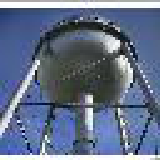

In [93]:
# Display image

water_tower_img

In [94]:
# Display top 5 predictions

get_top_5_predictions(water_tower_img)

,prediction
1,solar dish
2,water tower
3,aircraft carrier
4,jigsaw puzzle
5,oxygen mask


### Notes
* The spatial dimension of the output decreases when we increase the stride in a convolutional layer.
* The effect of using pooling layers in convolutional neural networks helps to make the model invariantto small translations of the input. It also helps to reduce the spatial dimensions of the input layer.
* A flatten layer unrolls the input into a one-dimensional tensor.


### Other Readings
* https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721
* https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0
* https://towardsdatascience.com/complete-guide-of-activation-functions-34076e95d044
